In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [18]:
os.chdir("c:\\Users\\Charl\\OneDrive\\桌面\\Machine Learning\\MATH-244-Project1")

In [19]:
data = pd.read_csv("Data/German Credit/data/german_credit_data.csv")

In [20]:
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Exploring the Data

1. What is your outcome variables? How well does it measure the outcomes you are interested? How does it relate to your expectations? 

The outcome variable is going to be the target in the dataset. It is a binary variable that describes whether the person has a good or bad credit classification with 1 indicating bad and 2 indicating good. Although in real life scenarios, the credit of a person should not be arbitarily classified as Good or Bad, we'd like to use this simple set up first to try out the machine learning algorithms in binary classification tasks. 

2. What are your key explanatory variables? 

We are actually planning to use all the of the 20 attributes as our independent variables for the prediction model to use.

In [21]:
Attribute3 = pd.DataFrame(data["Attribute3"].value_counts())
print(tabulate(Attribute3, headers=["Credit History", "Counts"]))

Credit History      Counts
----------------  --------
A32                    530
A34                    293
A33                     88
A31                     49
A30                     40


In [22]:
Attribute5 = pd.DataFrame(data["Attribute5"]).describe()
print(tabulate(Attribute5, headers=["Measurement", "Credit Amount"]))

Measurement      Credit Amount
-------------  ---------------
count                  1000
mean                   3271.26
std                    2822.74
min                     250
25%                    1365.5
50%                    2319.5
75%                    3972.25
max                   18424


## Data Wrangling and Transformation

1. What data cleaning did you have to do? How did you wrangle the data? Are you deciding to exclude any observations? 

We did not do any data clearning or data wrangling cause the dataset is already super clean. We also did not exclude any observations because there is not a good reason to. 

2. Did you have to create any new variables from existing variables? 

Yes. We are creating Attribute21 as Credit amount per month from Attribute2 (Duration in Months) and Attribute5 (Credit Amounts). We did this because we believe that people that has a higher duration in month tend to have higher credit amounts. Therefore, a fair statistic should be the average amount of credit per month. 

In [23]:
data["Attribute21"] = data["Attribute5"] / data["Attribute2"]
data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,target,Attribute21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,194.833333
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,123.979167
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,174.666667
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,187.666667
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,202.916667


## Data Visualization

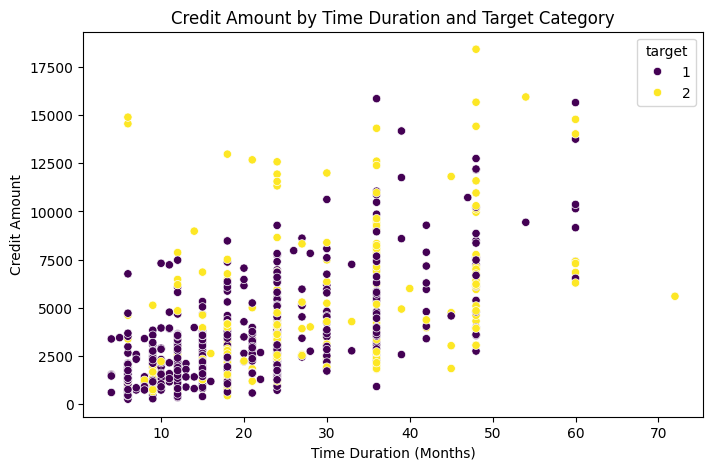

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Attribute2", y="Attribute5", hue="target", palette="viridis", legend=True)

plt.xlabel("Time Duration (Months)")
plt.ylabel("Credit Amount")
plt.title("Credit Amount by Time Duration and Target Category")
plt.show()

C:\Users\Charl\AppData\Local\Temp\ipykernel_16584\103888497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="target", y="Attribute13", palette="viridis")


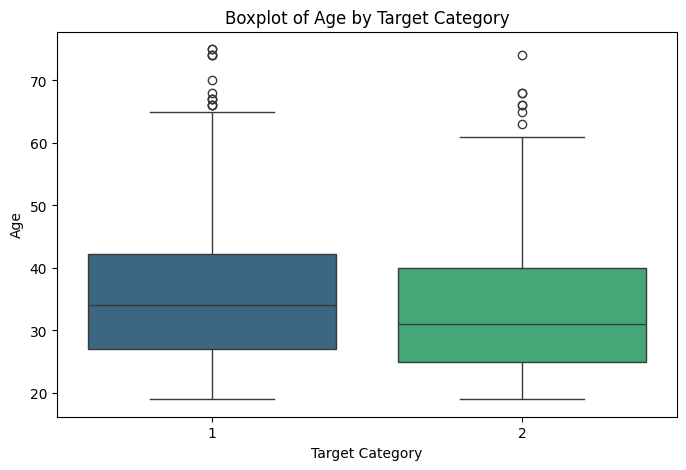

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="target", y="Attribute13", palette="viridis")

plt.xlabel("Target Category")
plt.ylabel("Age")
plt.title("Boxplot of Age by Target Category")
plt.show()


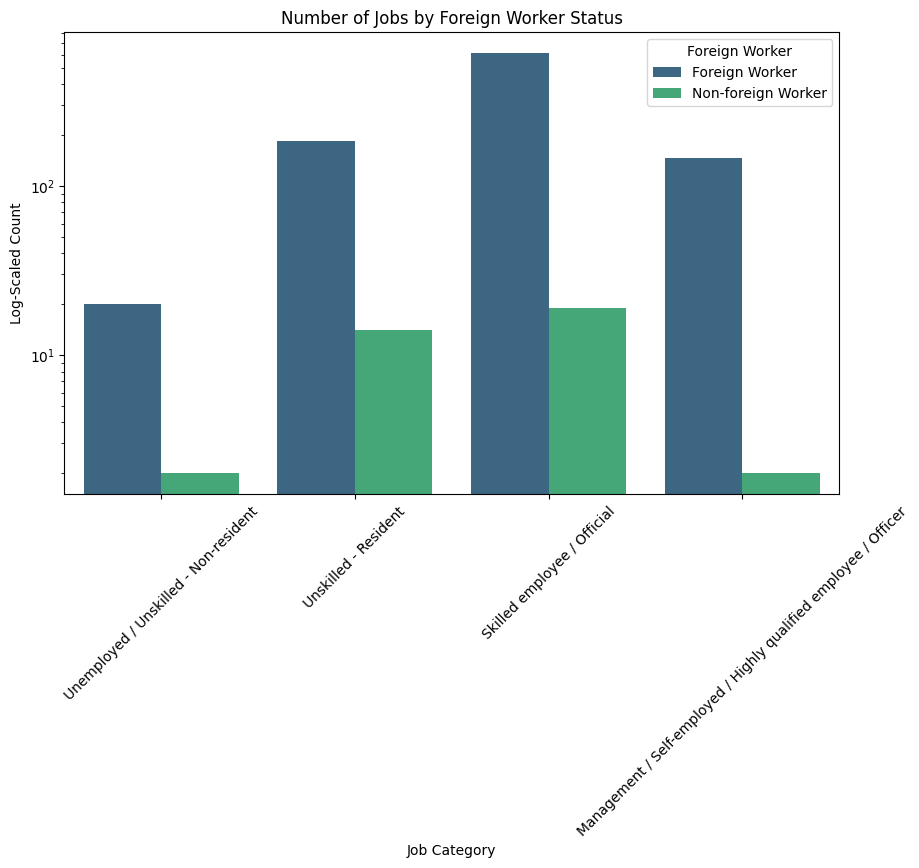

In [26]:
job_counts = data.groupby(['Attribute17', 'Attribute20']).size().reset_index(name='count')
job_counts['Attribute17'] = job_counts['Attribute17'].replace({'A171': 'Unemployed / Unskilled - Non-resident', 'A172': 'Unskilled - Resident', 'A173': 'Skilled employee / Official', 'A174':'Management / Self-employed / Highly qualified employee / Officer'})
job_counts['Attribute20'] = job_counts['Attribute20'].replace({'A201': 'Foreign Worker', 'A202':'Non-foreign Worker'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=job_counts, x='Attribute17', y='count', hue='Attribute20', palette='viridis')

plt.xlabel("Job Category")
plt.ylabel("Log-Scaled Count")
plt.title("Number of Jobs by Foreign Worker Status")
plt.legend(title="Foreign Worker")
plt.xticks(rotation=45)
ax.set_yscale("log")
plt.show()


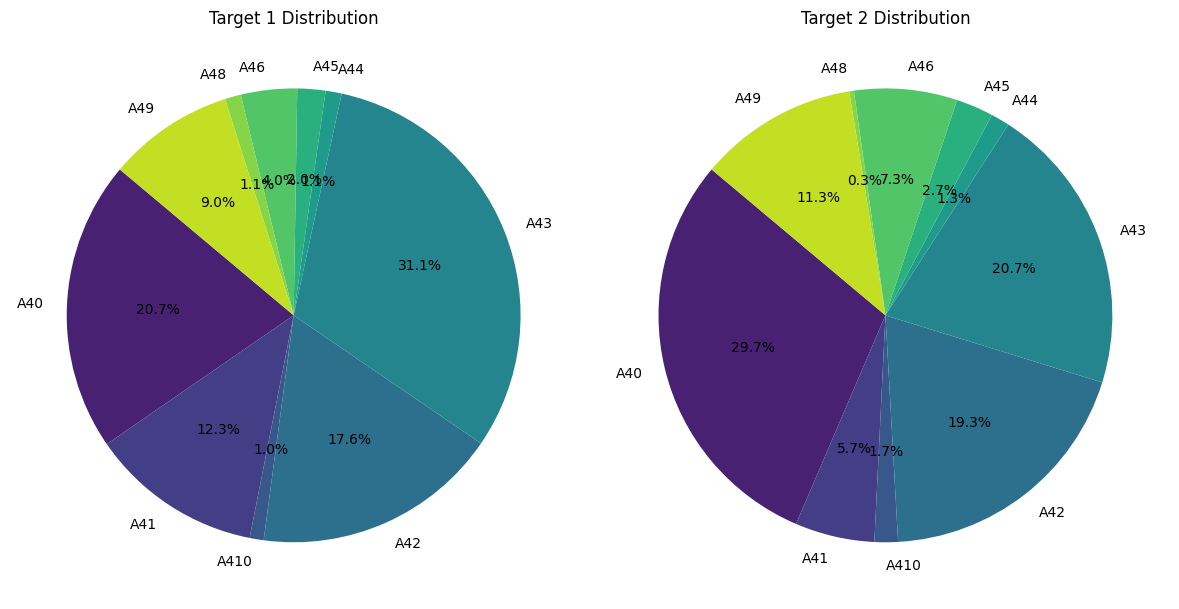

In [ ]:
purpose_counts = data.groupby(['Attribute4', 'target']).size().reset_index(name='count')
df_target1 = purpose_counts[purpose_counts["target"] == 1]
df_target2 = purpose_counts[purpose_counts["target"] == 2]

colors_target1 = sns.color_palette("viridis", len(df_target1))
colors_target2 = sns.color_palette("viridis", len(df_target2))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(df_target1["count"], labels=df_target1["Attribute4"], autopct='%1.1f%%', startangle=140, colors=colors_target1)
axes[0].set_title("Target 1 Distribution")

axes[1].pie(df_target2["count"], labels=df_target2["Attribute4"], autopct='%1.1f%%', startangle=140, colors=colors_target2)
axes[1].set_title("Target 2 Distribution")

plt.tight_layout()
plt.show()